In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1=pd.read_csv('E:/Machine learning/bank-marketing.csv')

In [55]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Exploration

In [56]:
df1.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [57]:
df1.shape

(45211, 19)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [59]:
df1['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

As we can see there are no any missing values here.

In [60]:
df=df1.copy()

In [61]:
df.drop(df1[df1['pdays']<0].index, inplace=True)

In [62]:
df['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:ylabel='education'>

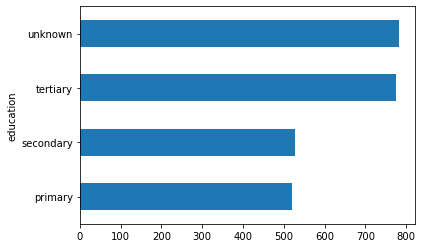

In [63]:
df.groupby(['education'])['balance'].median().plot.barh()


Tertiary level of education having median value for balance as the plot implies


### Make a box plot for pdays. Do you see any outliers?

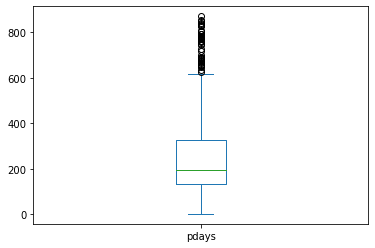

In [64]:
df.pdays.plot.box()
plt.show()

Boxplot confirms the presence of outliers( data point that differs significantly from other observations)

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.

First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.

- Convert the response variable to a convenient form
- Make suitable plots for associations with numerical features and categorical features’

Are the features about the previous campaign data useful?
Are pdays and poutcome associated with the target?
If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

In [65]:
df['response'].value_counts()

no     6352
yes    1905
Name: response, dtype: int64

In [66]:
df.response.value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [67]:
df.replace({'response': {"yes":1, "no":0}}, inplace=True)

In [68]:
df['response'].value_counts()

0    6352
1    1905
Name: response, dtype: int64

Taking away objects and numerical datatypes.

In [69]:
obj_col = []
num_col = []
for col in df.columns:
    if df[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [70]:
print("Features of Object ",obj_col)
print(" Features of Numerical ",num_col)

Features of Object  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
 Features of Numerical  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


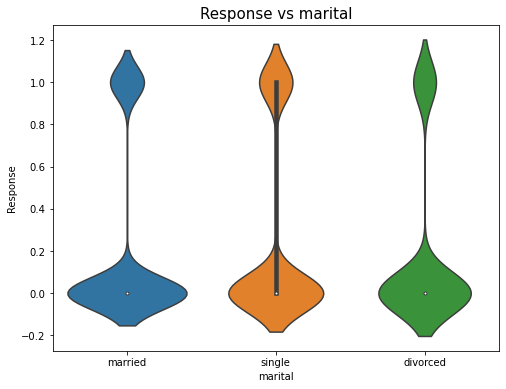

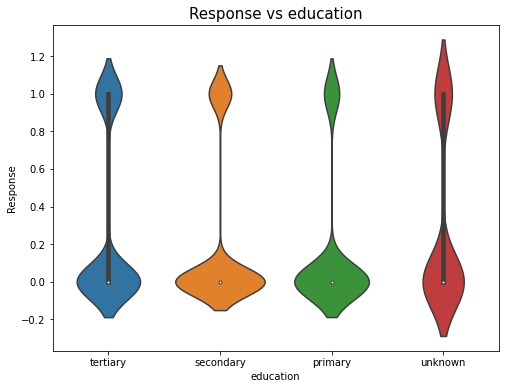

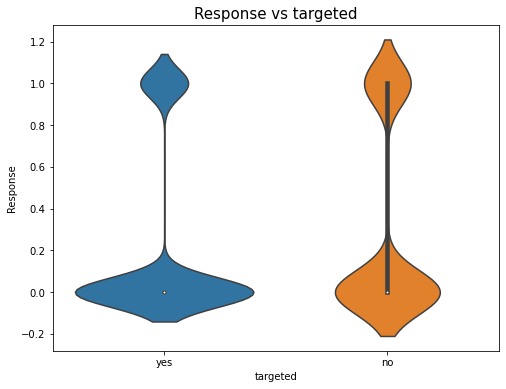

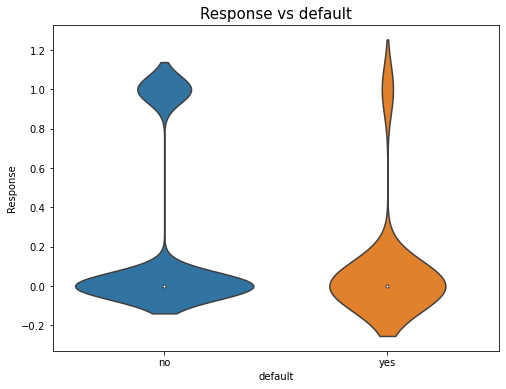

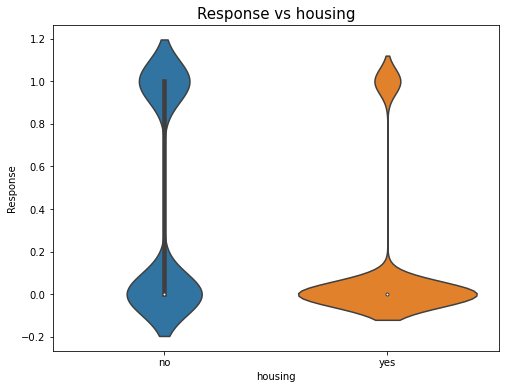

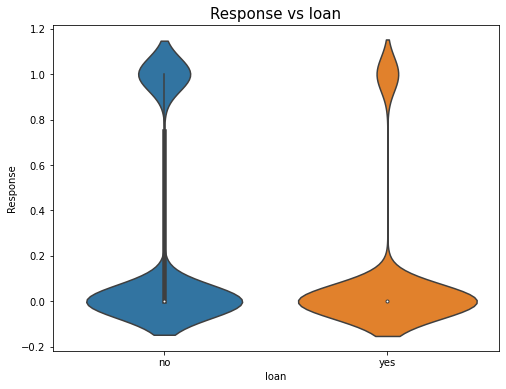

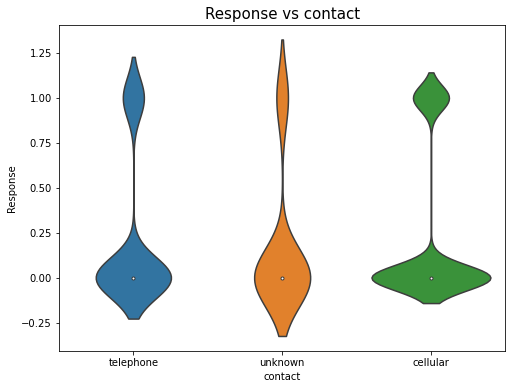

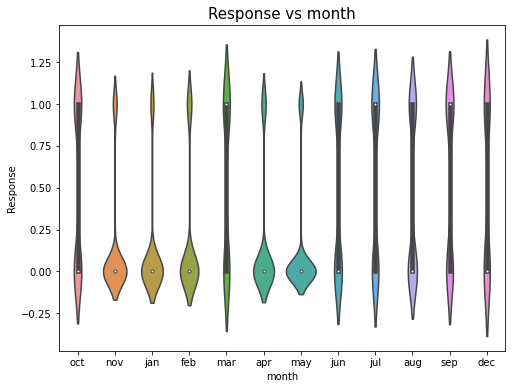

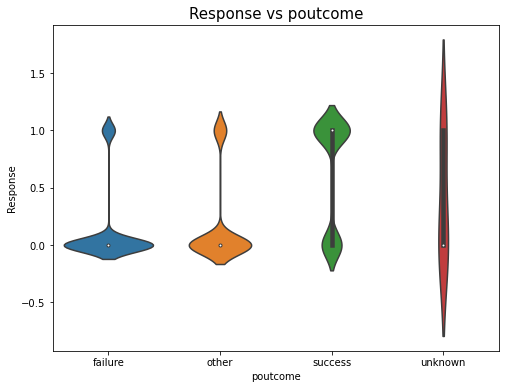

In [71]:
## violin plot is used as it shows whether data is positive/negative skewed.

from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(df[col],df["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

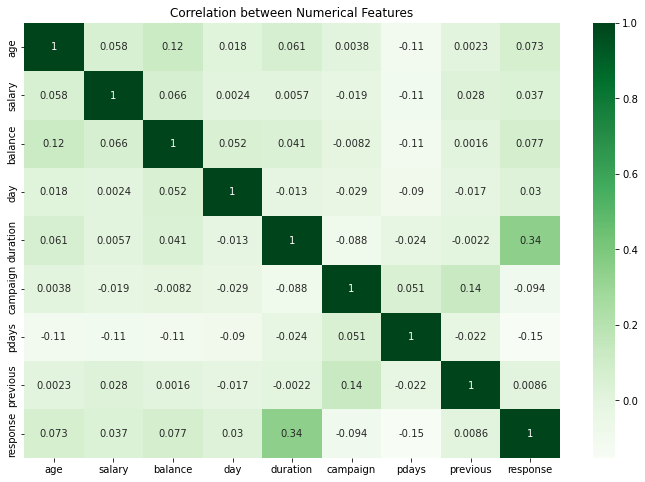

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.title("Correlation between Numerical Features")
plt.show()

<Figure size 720x576 with 0 Axes>

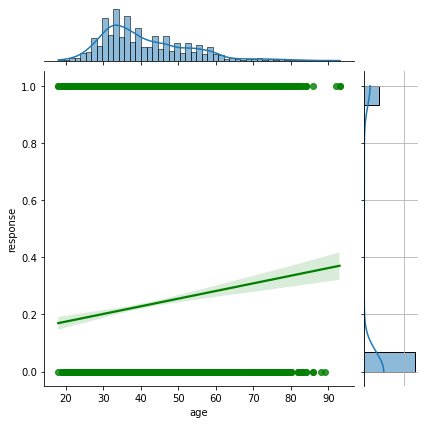

<Figure size 720x576 with 0 Axes>

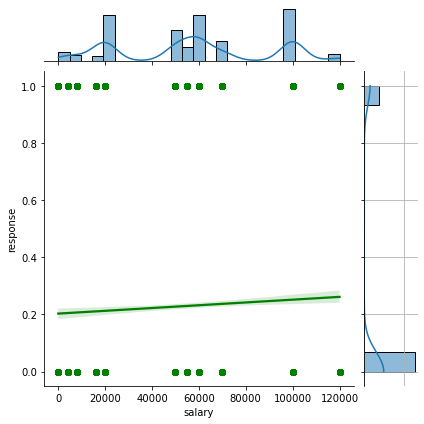

<Figure size 720x576 with 0 Axes>

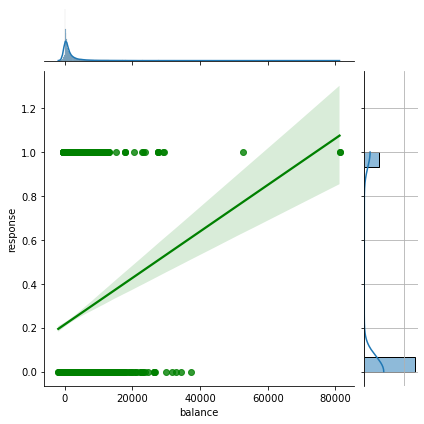

<Figure size 720x576 with 0 Axes>

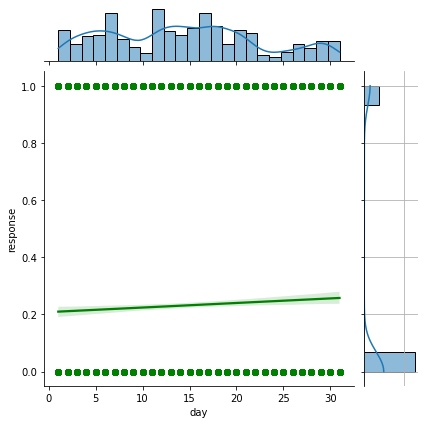

<Figure size 720x576 with 0 Axes>

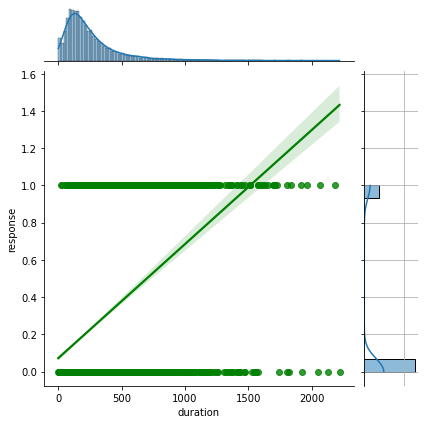

<Figure size 720x576 with 0 Axes>

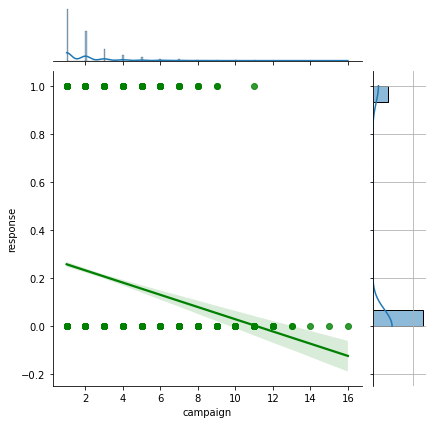

<Figure size 720x576 with 0 Axes>

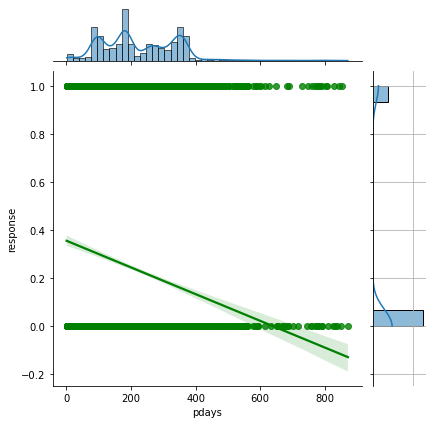

<Figure size 720x576 with 0 Axes>

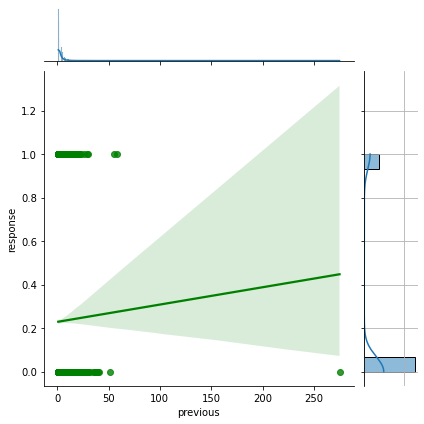

In [75]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[col],y = df["response"],kind='reg',joint_kws={'color':'green'})
    plt.xlabel(col,fontsize = 12)
    plt.ylabel("Response",fontsize = 12)
    plt.grid()
    plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder

In [80]:
df2 = df[obj_col].apply(LabelEncoder().fit_transform)

In [82]:
df2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [83]:
df3 = df2.join(df[num_col])

In [84]:
df3.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


# Logistic Regression

In [85]:
X = df3.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [86]:
y= df3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,f1_score
np.random.seed(42)
from sklearn.model_selection import cross_val_score
lr.fit(X_train,y_train)

LogisticRegression()

In [88]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.777895533686601

In [89]:
y_pred = lr.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.75      0.79      0.74      1652



In [91]:
confusion_matrix(y_pred,y_test)

array([[1224,  297],
       [  55,   76]], dtype=int64)

In [92]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [93]:
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [94]:
rfe.support_

array([False, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False])

In [95]:
X_train.columns[rfe.support_]

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

In [96]:
cols = X_train.columns[rfe.support_]

In [97]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [98]:
y_pred2 = lr.predict(X_test[cols])

In [99]:
f1_score(y_pred2,y_test)

0.5043177892918826

In [100]:
confusion_matrix(y_pred2,y_test)

array([[1219,  227],
       [  60,  146]], dtype=int64)

## Using Stats model

In [101]:
import statsmodels.api as StatMod

In [102]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
40829,0,2,1,1,0,1,0,0,1,2,40,50000,100,11,221,1,461,1
29715,9,1,1,1,0,0,1,0,3,0,45,60000,366,3,235,2,169,12
35015,9,1,1,1,0,1,0,0,8,0,32,60000,-360,6,131,2,344,2
41008,0,2,2,0,0,0,0,0,1,2,36,50000,994,13,185,2,105,3
40646,8,2,1,1,0,1,0,1,1,0,25,4000,41,5,100,2,93,2


In [103]:
X_train_StatMod = StatMod.add_constant(X_train[cols])
X_train_StatMod.head()

,const,education,default,housing,loan,poutcome
40829,1.0,1,0,1,0,2
29715,1.0,1,0,0,1,0
35015,1.0,1,0,1,0,0
41008,1.0,2,0,0,0,2
40646,1.0,1,0,1,0,0


In [104]:
Logreg = StatMod.OLS(y_train, X_train_StatMod).fit()

In [105]:
Logreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     378.7
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        15:49:22   Log-Likelihood:                -2841.7
No. Observations:                6605   AIC:                             5695.
Df Residuals:                    6599   BIC:                             5736.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2088      0.013     16.334      0.000       0.184       0.234
education      0.0284      0.006      4.467      0.000       0.016       0.041
default       -0.0541      0.056     -0.970      0.332      -0.164       0.055
housing       -0.1827      0.010    -18.347      0.000      -0.202      -0.163
loan          -0.0701      0.014     -5.178      0.000      -0.097      -0.044
poutcome       0.1861      0.006     30.296      0.000       0.174       0.198
==============================================================================
Omnibus:                      738.566   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1008.503
Skew:                           0.946   Prob(JB):                    1.01e-219
Kurtosis:                       3.286   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Variance inflation factor

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.79
2,education,6.43
3,targeted,6.43
11,salary,5.38
16,pdays,5.21
1,marital,4.35
13,day,4.10
8,month,3.60
5,housing,3.14
15,campaign,2.87


 Housing, loan, default, poutcome are important features from logistic regression model

# Random Forest Model

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [112]:
rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [113]:
score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(score)

0.8392127176381529

In [114]:
y_predict = rfc.predict(X_test)

In [115]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1279
           1       0.80      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [116]:
f1_score(y_test,y_predict)

0.5728987993138936

In [117]:
confusion_matrix(y_test,y_predict)

array([[1236,   43],
       [ 206,  167]], dtype=int64)

In [118]:
from sklearn.metrics import roc_auc_score

In [119]:
roc_auc_score(y_test,y_predict)

0.7070505819937242

In [120]:
from sklearn.feature_selection import RFE

In [121]:
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=42),
    n_features_to_select=5)

In [122]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [123]:
X_train.columns[rfe1.support_]


Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [124]:
cols = X_train.columns[rfe1.support_]

In [125]:
rfc.fit(X_train[cols],y_train)


RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [126]:
y_pred3 = rfc.predict(X_test[cols])

In [127]:
f1_score(y_pred3,y_test)

0.631911532385466

In [128]:
confusion_matrix(y_pred3,y_test)

array([[1219,  173],
       [  60,  200]], dtype=int64)

Housing, month, pdays, poutcome, duration are important features from Random forest
